<a href="https://colab.research.google.com/github/aminbuet/Deep_Learning_Projects/blob/master/feature_crosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Try with scikit learn**



/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


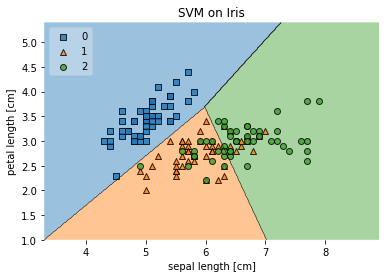

In [0]:
# Making decision surface or boundary by using straight line
from sklearn import datasets
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# load data
iris = datasets.load_iris()
X = iris.data[:, 0:2]
y = iris.target

# Train Classifier
svm = SVC(C=0.5, kernel="linear")
svm.fit(X,y)

# plot with library
plot_decision_regions(X, y, clf=svm, legend=2)

#show
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

A non-linear Example with real data

In [0]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split

# df = pd.read_csv('geoloc_elev.csv')
df = pd.read_csv('https://raw.githubusercontent.com/raqueeb/TensorFlow2/master/datasets/geoloc_elev.csv')

# Only two feature is enough to check 
X = df[['lat', 'lon']].values
y = df['target'].values

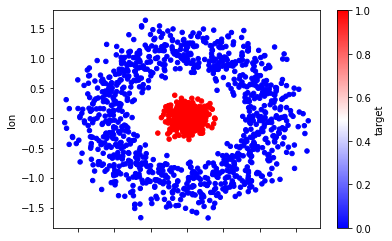

In [0]:
df.plot(kind='scatter',
        x='lat',
        y='lon',
        c='target',
        cmap='bwr')

In [0]:
# Use Suppport Vector Machine
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


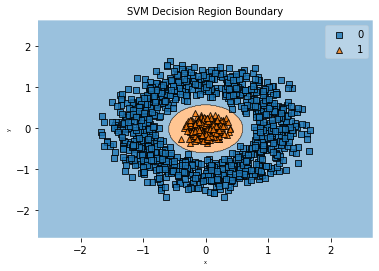

In [0]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

#Plot
plot_decision_regions(X, y, clf=clf, legend=1)

plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('SVM Decision Region Boundary', size=10)
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

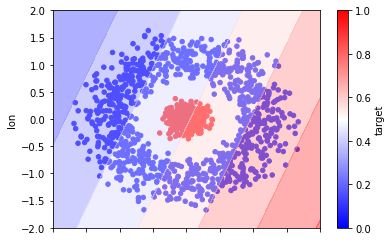

In [0]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = lr.predict_proba(ab)[:,1]
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

In [0]:
# check in basic neural network
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
result = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
30/30 [==============================] - 0s 6ms/step - loss: 0.6620 - accuracy: 0.5852 - val_loss: 0.6822 - val_accuracy: 0.6381
Epoch 2/20
30/30 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6582 - val_loss: 0.6672 - val_accuracy: 0.6381
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6582 - val_loss: 0.6687 - val_accuracy: 0.6381
Epoch 4/20
30/30 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.6582 - val_loss: 0.6663 - val_accuracy: 0.6381
Epoch 5/20
30/30 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6582 - val_loss: 0.6677 - val_accuracy: 0.6381
Epoch 6/20
30/30 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6582 - val_loss: 0.6685 - val_accuracy: 0.6381
Epoch 7/20
30/30 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.6582 - val_loss: 0.6674 - val_accuracy: 0.6381
Epoch 8/20
30/30 [==

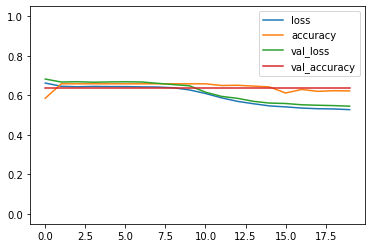

In [0]:
# Accuracy plot
pd.DataFrame(result.history).plot(ylim=(-0.05, 1.05))

Instructions for updating:
Please use `model.predict()` instead.


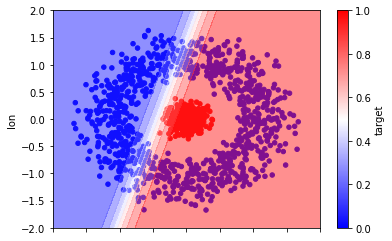

In [0]:
# Check decision boundary
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

# c = model.predict_proba(ab)[:,1]
c = model.predict_proba(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim=2, activation='tanh'),
    # এই লেয়ার পরে যোগ করে আমরা দেখবো 
    # tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
30/30 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.6222 - val_loss: 0.6231 - val_accuracy: 0.6381
Epoch 2/20
30/30 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.6603 - val_loss: 0.5261 - val_accuracy: 0.6381
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.8286 - val_loss: 0.4399 - val_accuracy: 0.7429
Epoch 4/20
30/30 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8815 - val_loss: 0.3544 - val_accuracy: 0.8952
Epoch 5/20
30/30 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8868 - val_loss: 0.3010 - val_accuracy: 0.9143
Epoch 6/20
30/30 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.9016 - val_loss: 0.2502 - val_accuracy: 0.9524
Epoch 7/20
30/30 [==============================] - 0s 2ms/step - loss: 0.2285 - accuracy: 0.9524 - val_loss: 0.1966 - val_accuracy: 0.9905
Epoch 8/20
30/30 [==

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

,pred_Miss,pred_Hit
Miss,311,0
Hit,0,139


In [0]:
train_score = model.evaluate(X_train, y_train, verbose=0)[1]
test_score = model.evaluate(X_test, y_test,  verbose=0)[1]

print("""Accuracy scores:
   Train:\t{:0.3}
   Test:\t{:0.3}""".format(train_score, test_score))

Accuracy scores:
   Train:	1.0
   Test:	1.0


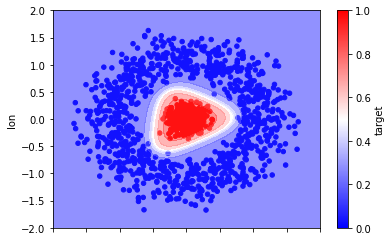

In [0]:
# Almost correct 
# Increased layer accuracy increased
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)